In [1]:
import os

import analysis_plotting_helper_functions_c3v3 as helper
import session_processing_helper_c5 as processing_helper
import analysis_utils as utils
import utils_c5v2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data_dir = '/Users/rebekahzhang/data/behavior_data'
exp = "exp2"
cohort = "c567"
data_folder = os.path.join(data_dir, exp, cohort)
figure_folder = os.path.join(data_dir, exp, f'{cohort}_figures')
print(data_folder)
print(figure_folder)

/Users/rebekahzhang/data/behavior_data/exp2/c567
/Users/rebekahzhang/data/behavior_data/exp2/c567_figures


In [3]:
# two_colors = plt.cm.viridis(np.linspace(0, 1, 2))
two_colors = ["#ffb400", "#9080ff"]
custom_palette = {'s': two_colors[0], 'l': two_colors[1]}

# Merge session logs of different cohorts
merging two logs and adding training session number, then saving. remember to move data from cohort folders to combined folder. Does not need to be re run

In [4]:
sessions_c5 = pd.read_csv(os.path.join(data_dir, exp, 'cohort_5', 'sessions_training.csv'))
sessions_c5['cohort'] = 'cohort_5'
sessions_c6 = pd.read_csv(os.path.join(data_dir, exp, 'cohort_6', 'sessions_training.csv'))
sessions_c6['cohort'] = 'cohort_6'
sessions_c7 = pd.read_csv(os.path.join(data_dir, exp, 'cohort_7', 'sessions_training.csv'))
sessions_c7['cohort'] = 'cohort_7'

In [5]:
sessions_c567 = pd.concat([sessions_c5, sessions_c6, sessions_c7])

In [6]:
sessions_c567 = sessions_c567.drop(columns = ['Unnamed: 0'])
sessions_c567 = sessions_c567.groupby('mouse', group_keys=False).apply(processing_helper.assign_session_numbers)
sessions_c567 = sessions_c567.sort_values('dir')

In [7]:
sessions_c567

,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort
0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5
1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5
2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5
3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5
4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,2025-03-17_13-13-38_RZ059,l,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7
551,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,2025-03-18_11-12-43_RZ059,l,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7
552,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,2025-03-19_12-19-18_RZ059,l,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7
553,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,2025-03-20_13-48-44_RZ059,l,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7


In [8]:
utils_c5v2.save_as_csv(df=sessions_c567, folder=data_folder, filename='sessions_training.csv')

# Stats to figure out dataset
mega hack. i am not proud

In [9]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training.csv'))

In [10]:
sessions_by_mouse = sessions_training.groupby('mouse')
days_trained_list = []
for m, mouse_data in sessions_by_mouse:
    days_trained = mouse_data.session.max()
    days_trained_list.append({'mouse': m, 'days_trained': days_trained})
days_trained_df = pd.DataFrame(days_trained_list).sort_values(by=['days_trained'])

In [12]:
days_trained_df.sort_values("mouse")

,mouse,days_trained
0,RZ034,98
1,RZ036,100
2,RZ037,96
3,RZ038,95
4,RZ039,94
5,RZ047,88
6,RZ048,6
7,RZ049,78
8,RZ050,93
9,RZ051,92


In [13]:
early_termination = days_trained_df.loc[days_trained_df.days_trained < 10]
early_termination_mouse_list = early_termination.mouse.tolist()

In [14]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training.csv'))
# get rid of mice that died early
sessions_training = sessions_training.loc[~sessions_training['mouse'].isin(early_termination_mouse_list)]

In [15]:
sorted_mouse_list = sorted(sessions_training.mouse.unique())
print(sorted_mouse_list)

['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039', 'RZ047', 'RZ049', 'RZ050', 'RZ051', 'RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056', 'RZ057', 'RZ058', 'RZ059', 'RZ061', 'RZ062', 'RZ063', 'RZ064', 'RZ065', 'RZ067', 'RZ068', 'RZ069', 'RZ070', 'RZ072']


In [ ]:
# only doing it for the first 57 days because the second cohort has only 57 days
# sessions_training = sessions_training.loc[sessions_training['session'] <= 53]

In [16]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [17]:
wait_df = generate_wait_df(sessions_training)

In [18]:
def generate_mouse_wait_df(wait_df):
    data_list = []
    wait_df_by_mouse = wait_df.groupby('mouse')
    for m, mouse_data in wait_df_by_mouse:
        avg_avg_tw = mouse_data['tw_mean'].mean()
        data = {"mouse": m, 'tw': avg_avg_tw, 'group':mouse_data.group.tolist()[0]}
        data_list.append(data)
    mouse_wait_df = pd.DataFrame(data_list).sort_values(by=['group','tw'])
    return mouse_wait_df

In [19]:
mouse_wait_df = generate_mouse_wait_df(wait_df)
display(mouse_wait_df)

,mouse,tw,group
13,RZ056,2.482505,l
9,RZ052,2.897531,l
2,RZ037,3.196706,l
21,RZ065,3.384648,l
10,RZ053,3.606060,l
22,RZ067,3.628570,l
14,RZ057,3.716983,l
23,RZ068,3.964473,l
15,RZ058,4.725533,l
4,RZ039,4.961609,l


### zscore to find outlier sessions

In [20]:
def calculate_tw_z_score(mouse_data):
    time_waited = mouse_data['tw_mean']
    z_score = stats.zscore(time_waited)
    mouse_data['tw_z_score'] = z_score
    return mouse_data

In [21]:
wait_df = wait_df.groupby('mouse', group_keys=False).apply(calculate_tw_z_score)
outlier_sessions = wait_df[(wait_df['tw_z_score'] > 3) | (wait_df['tw_z_score'] < -3)].sort_values("mouse")
wait_df_no_outlier = wait_df[wait_df['tw_z_score'].between(-3, 3)]

In [22]:
print(len(outlier_sessions))
outlier_sessions

27


,mouse,session,dir,group,tw_mean,tw_median,tw_stdev,tw_mean_g,tw_median_g,tw_stdev_g,tw_z_score
407,RZ034,82,2024-06-13_16-06-25_RZ034,s,5.898440,3.938644,6.176406,6.121558,4.066342,6.395934,3.827670
161,RZ036,32,2024-03-12_10-31-04_RZ036,s,7.717843,6.922772,6.313204,8.232715,7.098698,6.496484,3.823600
632,RZ036,99,2024-07-13_14-29-03_RZ036,s,8.204216,5.102505,10.406528,9.228556,5.294567,11.251898,4.159993
634,RZ036,100,2024-07-14_14-34-59_RZ036,s,6.690554,4.101032,9.955435,7.116551,4.239025,10.565769,3.113088
127,RZ037,25,2024-03-01_11-15-25_RZ037,l,11.590128,6.621077,11.946763,13.076591,8.186497,12.267641,3.549325
673,RZ037,95,2024-07-18_12-39-17_RZ037,l,11.444755,7.322944,12.075680,11.417565,7.342547,11.887813,3.487852
709,RZ047,24,2024-07-25_10-22-33_RZ047,s,9.692251,5.159410,10.615050,9.938775,5.311525,10.725057,5.748335
729,RZ050,26,2024-07-29_11-10-36_RZ050,s,14.641873,11.341994,14.449534,15.870574,12.799060,14.310668,6.913085
1027,RZ050,59,2024-09-18_11-07-41_RZ050,s,7.938989,5.847991,8.706569,8.610614,7.128493,8.692453,3.115765
712,RZ051,24,2024-07-25_11-49-37_RZ051,s,7.895066,5.323081,9.800069,8.248046,5.450204,10.226429,3.480476


In [23]:
mouse_wait_df = generate_mouse_wait_df(wait_df_no_outlier)
display(mouse_wait_df)

,mouse,tw,group
13,RZ056,2.363165,l
9,RZ052,2.812797,l
2,RZ037,3.021533,l
21,RZ065,3.384648,l
10,RZ053,3.427974,l
22,RZ067,3.466902,l
14,RZ057,3.535379,l
23,RZ068,3.770393,l
15,RZ058,4.510526,l
4,RZ039,4.961609,l


In [24]:
sessions_training

,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort
0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5
1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5
2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5
3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5
4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,550,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,2025-03-17_13-13-38_RZ059,l,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7
1802,551,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,2025-03-18_11-12-43_RZ059,l,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7
1803,552,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,2025-03-19_12-19-18_RZ059,l,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7
1804,553,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,2025-03-20_13-48-44_RZ059,l,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7


In [25]:
wait_df_no_outlier_to_merge = wait_df_no_outlier[['dir', 'tw_mean']]
sessions_training = pd.merge(sessions_training, wait_df_no_outlier_to_merge, on='dir')
sessions_training = sessions_training.drop(columns = ['Unnamed: 0'])

In [26]:
utils_c5v2.save_as_csv(df=sessions_training, folder=data_folder, filename='sessions_training_no_outliers.csv')

### Within group anova to find outlier mouse

In [27]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training_no_outliers.csv'))

In [28]:
short = sessions_training[sessions_training['group']=='s']
long = sessions_training[sessions_training['group']=='l']

In [29]:
short_by_mouse = short.groupby('mouse')
mouse_names = short.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [short_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(short['tw_mean'], short['mouse'])
print(tukey_results)

F-stats: 68.58163163633328
P-value: 3.87941435115289e-114
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ034  RZ036   0.0402    1.0 -0.7255  0.8058  False
 RZ034  RZ047   0.3049 0.9871 -0.4823   1.092  False
 RZ034  RZ049   5.5993    0.0  4.7889  6.4097   True
 RZ034  RZ050   0.2611 0.9964  -0.517  1.0392  False
 RZ034  RZ051   0.3827 0.9219 -0.3998  1.1652  False
 RZ034  RZ061   1.4551    0.0  0.5355  2.3746   True
 RZ034  RZ062  -0.3762 0.9846 -1.3271  0.5748  False
 RZ034  RZ063   0.8019 0.1941 -0.1423  1.7462  False
 RZ034  RZ064  -0.2718    1.0 -1.5136    0.97  False
 RZ034  RZ069   1.5775 0.0001  0.4988  2.6563   True
 RZ034  RZ070   0.3191 0.9984 -0.7151  1.3533  False
 RZ034  RZ072   0.9756 0.1938 -0.1729  2.1241  False
 RZ036  RZ047   0.2647 0.9964 -0.5224  1.0519  False
 RZ036  RZ049   5.5591    0.0  4.7487  6.3696   True
 RZ036  RZ050   0.2209 0.9993 -0.5571   0

In [30]:
# get rid of outlier mouse based on tuckey test restults
# no 49 or 69
short = short[~short['mouse'].isin(['RZ049', 'RZ069'])] 
short_by_mouse = short.groupby('mouse')
mouse_names = short.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [short_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(short['tw_mean'], short['mouse'])
print(tukey_results)

F-stats: 10.326312947249013
P-value: 2.398119347990594e-16
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ034  RZ036   0.0402    1.0 -0.4958  0.5762  False
 RZ034  RZ047   0.3049 0.7877 -0.2461  0.8559  False
 RZ034  RZ050   0.2611 0.9028 -0.2836  0.8058  False
 RZ034  RZ051   0.3827 0.4656 -0.1651  0.9304  False
 RZ034  RZ061   1.4551    0.0  0.8114  2.0988   True
 RZ034  RZ062  -0.3762  0.765 -1.0419  0.2895  False
 RZ034  RZ063   0.8019 0.0047  0.1409  1.4629   True
 RZ034  RZ064  -0.2718 0.9954 -1.1411  0.5975  False
 RZ034  RZ070   0.3191 0.9423 -0.4048  1.0431  False
 RZ034  RZ072   0.9756 0.0046  0.1716  1.7796   True
 RZ036  RZ047   0.2647 0.9015 -0.2863  0.8157  False
 RZ036  RZ050   0.2209  0.967 -0.3237  0.7656  False
 RZ036  RZ051   0.3425 0.6355 -0.2053  0.8903  False
 RZ036  RZ061   1.4149    0.0  0.7712  2.0586   True
 RZ036  RZ062  -0.4163 0.6351  -1.082  0

In [31]:
long_by_mouse = long.groupby('mouse')
mouse_names = long.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [long_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(long['tw_mean'], long['mouse'])
print(tukey_results)

F-stats: 15.995710322276524
P-value: 2.490664898894823e-33
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ037  RZ038   3.4342    0.0  2.1807  4.6877   True
 RZ037  RZ039   1.9401    0.0  0.6833  3.1969   True
 RZ037  RZ052  -0.2087    1.0 -1.5276  1.1101  False
 RZ037  RZ053   0.4064 0.9989 -0.9035  1.7164  False
 RZ037  RZ054   2.1586    0.0  0.8256  3.4916   True
 RZ037  RZ055   2.0543    0.0  0.7528  3.3557   True
 RZ037  RZ056  -0.6584 0.9308 -1.9963  0.6796  False
 RZ037  RZ057   0.5138 0.9968 -0.9712  1.9989  False
 RZ037  RZ058    1.489 0.0518 -0.0052  2.9832  False
 RZ037  RZ059   1.9519 0.0007  0.4843  3.4195   True
 RZ037  RZ065   0.3631    1.0 -1.2419  1.9681  False
 RZ037  RZ067   0.4454 0.9998 -1.2332  2.1239  False
 RZ037  RZ068   0.7489 0.9676 -0.9297  2.4274  False
 RZ038  RZ039  -1.4941 0.0051 -2.7476 -0.2406   True
 RZ038  RZ052  -3.6429    0.0 -4.9587 -2

In [32]:
long = long[~long['mouse'].isin(['RZ056', 'RZ052'])] 
long_by_mouse = long.groupby('mouse')
mouse_names = long.mouse.unique().tolist()

# Extract 'tw_mean' values for each mouse and store them in a list of lists
tw_mean_values = [long_by_mouse.get_group(m)['tw_mean'].tolist() for m in mouse_names]

# Perform the ANOVA test using the list of lists
f_stat, p_value = stats.f_oneway(*tw_mean_values)

print("F-stats:", f_stat)
print("P-value:", p_value)

tukey_results = pairwise_tukeyhsd(long['tw_mean'], long['mouse'])
print(tukey_results)

F-stats: 10.912430674935365
P-value: 6.139035726935303e-19
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RZ037  RZ038   3.4342    0.0  2.1191  4.7493   True
 RZ037  RZ039   1.9401 0.0001  0.6215  3.2586   True
 RZ037  RZ053   0.4064 0.9983 -0.9679  1.7808  False
 RZ037  RZ054   2.1586    0.0  0.7601  3.5571   True
 RZ037  RZ055   2.0543 0.0001  0.6889  3.4196   True
 RZ037  RZ057   0.5138 0.9954 -1.0442  2.0719  False
 RZ037  RZ058    1.489  0.081 -0.0786  3.0566  False
 RZ037  RZ059   1.9519 0.0021  0.4122  3.4917   True
 RZ037  RZ065   0.3631 0.9999 -1.3208   2.047  False
 RZ037  RZ067   0.4454 0.9996 -1.3157  2.2064  False
 RZ037  RZ068   0.7489 0.9646 -1.0122  2.5099  False
 RZ038  RZ039  -1.4941 0.0113 -2.8092  -0.179   True
 RZ038  RZ053  -3.0278    0.0 -4.3988 -1.6567   True
 RZ038  RZ054  -1.2756 0.1114 -2.6709  0.1197  False
 RZ038  RZ055    -1.38 0.0438  -2.742 -0

### getting rid of outlier sessions and outlier mice

from the results. 
I'm taking out only 049

In [33]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training_no_outliers.csv'))

In [34]:
# sessions_training = sessions_training.loc[~sessions_training['mouse'].isin(['RZ049', 'RZ069', 'RZ056', 'RZ052'])]

In [35]:
sessions_training = sessions_training.loc[~sessions_training['mouse'].isin(['RZ049'])]

### between group t-test

In [36]:
# differences with raw data
short = sessions_training[sessions_training['group']=='s']
long = sessions_training[sessions_training['group']=='l']

print(f'{len(short.mouse.unique())+len(long.mouse.unique())} mice')
print(short.tw_mean.mean())
print(long.tw_mean.mean())
print("diff:", long.tw_mean.mean()-short.tw_mean.mean())

#perform independent two sample t-test
stats.ttest_ind(short['tw_mean'], long['tw_mean'])

26 mice
2.3543489123876276
4.158621276811051
diff: 1.804272364423423


Ttest_indResult(statistic=-15.973365784562715, pvalue=1.3510228919503722e-53)

In [104]:
len(sessions_training)

1690

In [106]:
sessions_training.num_trials.sum()

604873.0

In [37]:
sessions_training = sessions_training.groupby('mouse', group_keys=False).apply(processing_helper.assign_session_numbers)

In [38]:
utils_c5v2.save_as_csv(df=sessions_training, folder=data_folder, filename='sessions_training_vetted.csv')

# Session based plotting

In [39]:
# there is an annoying unamed:0 colomn and i want to get rid of it
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training_vetted.csv'))

In [40]:
sessions_training

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean
0,0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,...,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5,0.466963
1,1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,...,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5,0.390074
2,2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,...,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5,1.696422
3,3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,...,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5,0.753882
4,4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,...,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5,1.179677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,1764,1764,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,...,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7,7.006051
1686,1765,1765,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,...,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7,2.554362
1687,1766,1766,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,...,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7,5.204634
1688,1767,1767,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,...,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7,5.028114


### make mouse list

In [41]:
mouse_list = utils_c5v2.generate_mouse_list(sessions_training)
# mouse_list = ['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039', 'RZ047', 'RZ050', 'RZ051', 'RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056']
print(mouse_list)

['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039', 'RZ047', 'RZ050', 'RZ051', 'RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056', 'RZ057', 'RZ058', 'RZ059', 'RZ061', 'RZ062', 'RZ063', 'RZ064', 'RZ065', 'RZ067', 'RZ068', 'RZ069', 'RZ070', 'RZ072']


In [42]:
mouse_wait_df = generate_mouse_wait_df(sessions_training)
cohort_group = {}
for group, group_df in mouse_wait_df.groupby('group'):
    cohort_group[group] = group_df['mouse'].tolist()
print(cohort_group)

{'l': ['RZ056', 'RZ052', 'RZ037', 'RZ065', 'RZ053', 'RZ067', 'RZ057', 'RZ068', 'RZ058', 'RZ039', 'RZ059', 'RZ055', 'RZ054', 'RZ038'], 's': ['RZ062', 'RZ064', 'RZ034', 'RZ036', 'RZ050', 'RZ047', 'RZ070', 'RZ051', 'RZ063', 'RZ072', 'RZ061', 'RZ069']}


### Plotting functions
should be moved to helper

In [43]:
def plot_each_mouse_per_line(data_df, column_name, plot_name, title, x_label, y_label, 
                             figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    palette = sns.color_palette("Spectral", n_colors=len(mouse_list)) 
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.session, session_mouse[column_name], color=palette[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [44]:
def plot_overdays_colored_by_group(data_df, column_name, plot_name, title, x_label, y_label, 
                                   figure_folder=figure_folder, color_palette=custom_palette):
    fig = plt.figure()
    sns.lineplot(x="session",
                 y=column_name,
                 hue="group",
                 data=data_df,
                 palette=color_palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.ylim(1,4)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

# Plot type of trials per session

### generate trial type df for plotting
Calculate proportions of trials types and generate trial type df

In [45]:
sessions_training

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean
0,0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,...,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5,0.466963
1,1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,...,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5,0.390074
2,2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,...,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5,1.696422
3,3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,...,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5,0.753882
4,4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,...,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5,1.179677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,1764,1764,RZ059,2025-03-17,13-13-38,2,regular,rig1,NaN,8.47,...,50,1.0,284.0,875.0,4622.56,Rebekah,True,miss,cohort_7,7.006051
1686,1765,1765,RZ059,2025-03-18,11-12-43,2,regular,rig1,NaN,2.55,...,51,1.0,434.0,900.0,5031.07,Rebekah,True,reward,cohort_7,2.554362
1687,1766,1766,RZ059,2025-03-19,12-19-18,2,regular,rig1,NaN,5.41,...,52,1.0,272.0,900.0,3782.92,Rebekah,True,reward,cohort_7,5.204634
1688,1767,1767,RZ059,2025-03-20,13-48-44,2,regular,rig1,NaN,5.55,...,53,1.0,316.0,900.0,4442.58,Rebekah,True,reward,cohort_7,5.028114


In [46]:
def generate_trial_type_df(training_session_log):
    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        session_performance = helper.get_session_performance(all_trials)
        training_session_log.loc[training_session_log.dir == session_info['dir'], 
                                    ['miss_trials', 'good_trials']] = session_performance
    trial_type_df = training_session_log[['mouse', 'group', 'session', 'num_trials', 
                                            'miss_trials', 'good_trials']].copy()
    trial_type_df['p_miss'] = trial_type_df.miss_trials/trial_type_df.num_trials
    trial_type_df['p_good'] = trial_type_df.good_trials/trial_type_df.num_trials
    trial_type_df['p_accident'] = 1 - trial_type_df.p_good - trial_type_df.p_miss 
    return trial_type_df

In [47]:
trial_type_df = generate_trial_type_df(sessions_training)

### trial type combined plot

In [48]:
# for group, mice in cohort_group.items():
#   fig, axs = plt.subplots(14, 1, figsize=(20, 10), sharex=True)

#   for i, mouse in enumerate(mice):
#     session_mouse = trial_type_df.loc[(trial_type_df.mouse == mouse) & (trial_type_df.group == group)]
#     to_plot = session_mouse.loc[:, ['session', 'p_good', 'p_miss', 'p_accident']]
#     ax = axs.flat[i]
#     to_plot.plot.bar(x='session', stacked=True, ax=ax, legend=None)
#     ax.set_title(mouse)
#     ax.set_xlabel('Sessions')
#     ax.set_ylabel('Normalized Proportion')
#     ax.plot(to_plot.session, to_plot.p_good, color='k', linewidth=1.5)
  
#   # if group == "l":
#   #   handles, labels = ax.get_legend_handles_labels()
#   #   fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
#   # if group == "s" and len(mice) < 5:
#   #   axs.flat[-1].axis('off')
#   plt.tight_layout()
#   plt.savefig(f'{figure_folder}/engagement_plots_{group}.png', bbox_inches='tight')

### percentage good trials

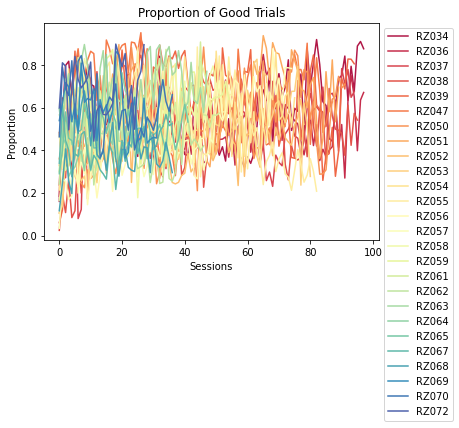

In [49]:
# plot the proportion of good trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_good', 
                         plot_name="%_good_trials", 
                         title='Proportion of Good Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

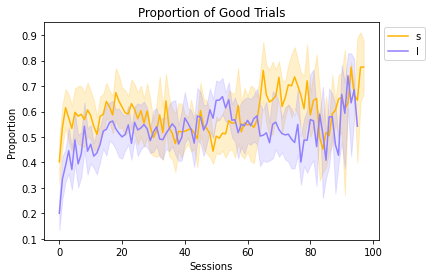

In [50]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_good", 
                               plot_name='%_good_trials_by_group', 
                               title='Proportion of Good Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent missed trials

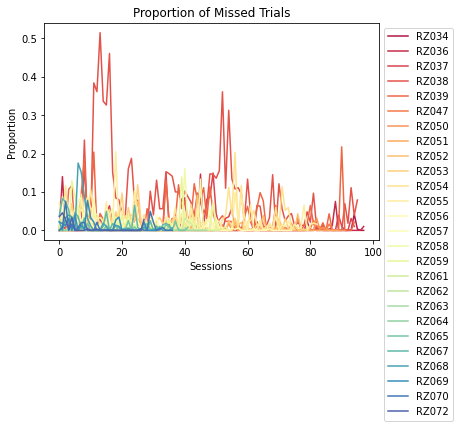

In [51]:
# plot the proportion of miss trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_miss', 
                         plot_name="%_miss_trials",
                         title='Proportion of Missed Trials', 
                         x_label='Sessions', 
                         y_label='Proportion')

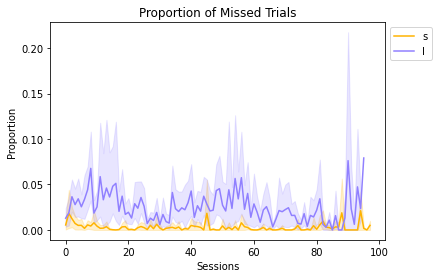

In [52]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_miss", 
                               plot_name='%_miss_trials_by_group', 
                               title='Proportion of Missed Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent accident trials

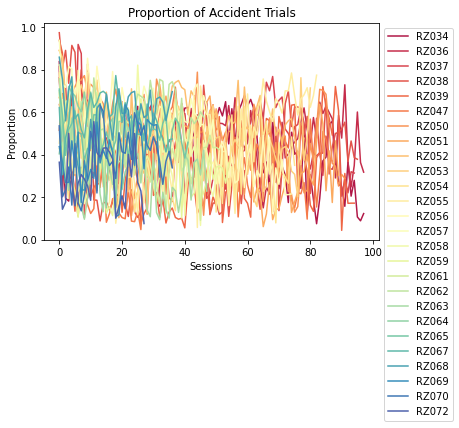

In [53]:
# plot the proportion of accident trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_accident', 
                         plot_name="%_accident_trials", 
                         title='Proportion of Accident Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

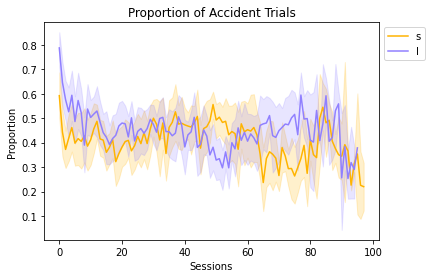

In [54]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_accident", 
                               plot_name='%_accident_trials_by_group', 
                               title='Proportion of Accident Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

# Plot rewards per session

### add info to training session log for plotting

In [55]:
def generate_reward_df(sessions):

    reward_df = sessions[['mouse', 'group', 'session', 'num_trials', 
                                            'rewards', 'session_time']].copy()
    reward_df['reward_rate'] = reward_df.rewards/reward_df.session_time
    reward_df['reward_per_trial'] = reward_df.rewards/reward_df.num_trials
    reward_df['num_trials_rewarded'] = reward_df.rewards/5
    reward_df['%_trials_rewarded'] = reward_df.num_trials_rewarded/reward_df.num_trials

    return reward_df

In [56]:
rewards_df = generate_reward_df(sessions_training)

### plot % rewarded trials

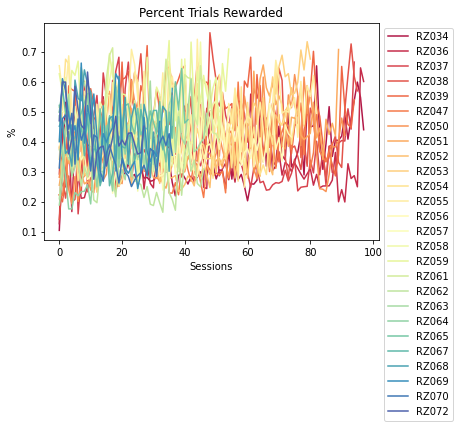

In [57]:
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='%_trials_rewarded', 
                         plot_name="%_trials_rewarded",
                         title='Percent Trials Rewarded', 
                         x_label='Sessions', 
                         y_label='%')

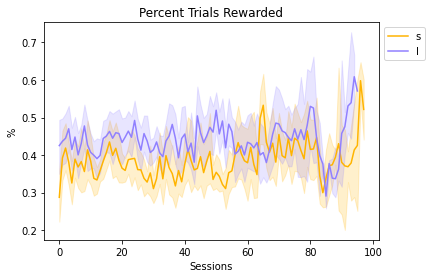

In [58]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="%_trials_rewarded", 
                               plot_name='%_trials_rewarded_by_group', 
                               title='Percent Trials Rewarded', 
                               x_label='Sessions', 
                               y_label='%')

### Plot reward rate

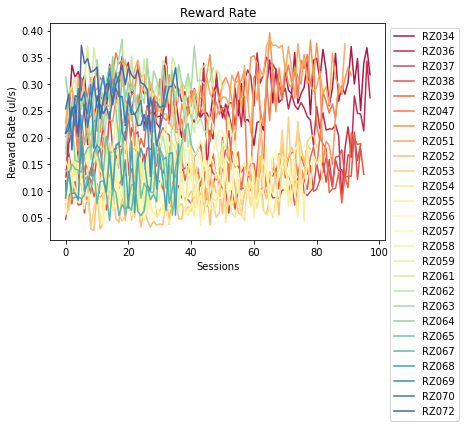

In [59]:
# plot the reward rate
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='reward_rate', 
                         plot_name="reward_rate",
                         title='Reward Rate', 
                         x_label='Sessions', 
                         y_label='Reward Rate (ul/s)')

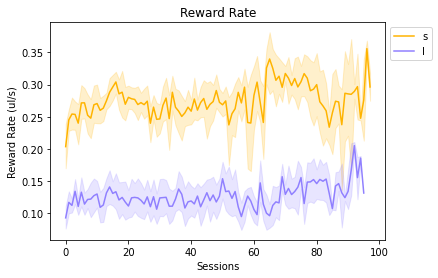

In [60]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="reward_rate", 
                               plot_name='reward_rate_by_group', 
                               title='Reward Rate', 
                               x_label='Sessions', 
                               y_label='Reward Rate (ul/s)')

### Plot session length

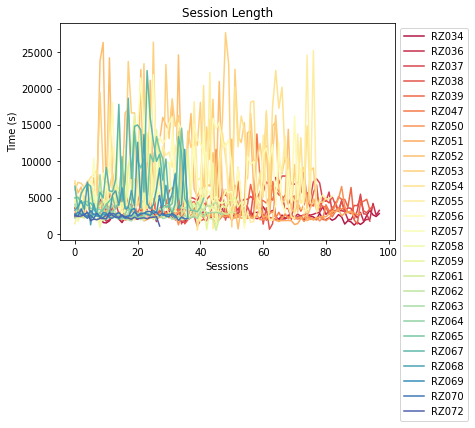

In [61]:
# plot the session length
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='session_time', 
                         plot_name="session_length", 
                         title='Session Length',
                         x_label='Sessions', 
                         y_label='Time (s)')

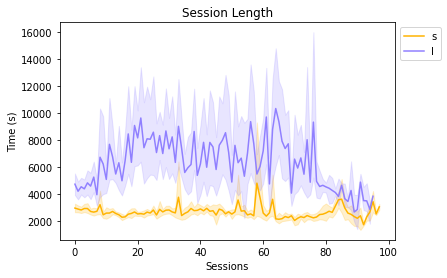

In [62]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="session_time", 
                               plot_name='session_length_by_group', 
                               title='Session Length', 
                               x_label='Sessions', 
                               y_label='Time (s)')

In [63]:
rewards_short = rewards_df[rewards_df['group']=='s'].sort_values(by='session_time')
rewards_short

,mouse,group,session,num_trials,rewards,session_time,reward_rate,reward_per_trial,num_trials_rewarded,%_trials_rewarded
1658,RZ061,s,45,55.0,180.0,534.59,0.336707,3.272727,36.0,0.654545
1490,RZ072,s,27,106.0,240.0,1128.54,0.212664,2.264151,48.0,0.452830
508,RZ034,s,89,175.0,355.0,1260.89,0.281547,2.028571,71.0,0.405714
745,RZ050,s,33,193.0,410.0,1288.60,0.318175,2.124352,82.0,0.424870
1054,RZ051,s,70,157.0,435.0,1342.92,0.323921,2.770701,87.0,0.554140
...,...,...,...,...,...,...,...,...,...,...
903,RZ047,s,52,565.0,855.0,7281.22,0.117425,1.513274,171.0,0.302655
968,RZ047,s,59,420.0,770.0,7627.55,0.100950,1.833333,154.0,0.366667
1245,RZ063,s,8,438.0,1300.0,8191.27,0.158706,2.968037,260.0,0.593607
953,RZ047,s,58,720.0,1400.0,13760.99,0.101737,1.944444,280.0,0.388889


In [64]:
sessions_training.loc[(sessions_training.mouse=='RZ047') & (sessions_training.session==58)]

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean,miss_trials,good_trials
953,1011,1011,RZ047,2024-09-20,12-44-45,2,regular,rig2,NaN,1.81,...,720.0,1400.0,13760.99,Rebekah,False,reward,cohort_6,2.131917,0.0,505.0


### plot num trials completed

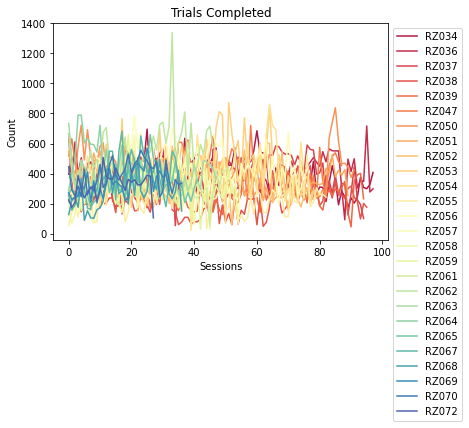

In [65]:
# plot the number of trials completed
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='num_trials', 
                         plot_name="num_trials", 
                         title='Trials Completed',
                         x_label='Sessions', 
                         y_label='Count')

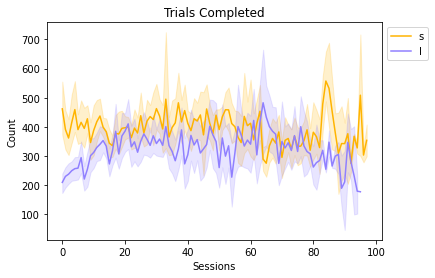

In [66]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="num_trials", 
                               plot_name='num_trials_by_group', 
                               title='Trials Completed', 
                               x_label='Sessions', 
                               y_label='Count')

# Plot background behavior

### generate mistake df for plotting

In [67]:
def get_session_mistakes(all_trials):
    all_trials['bg_repeats'] -= 1
    num_bg_repeats_mean = all_trials.bg_repeats.mean()
    num_bg_repeats_med = all_trials.bg_repeats.median()
    num_bg_repeats_std = all_trials.bg_repeats.std()
    num_bg_repeats_rate_mean = num_bg_repeats_mean/all_trials.bg_length.mean()
    return [num_bg_repeats_mean, num_bg_repeats_med, num_bg_repeats_std, num_bg_repeats_rate_mean]

In [68]:
def generate_mistake_df(training_session_log):
    mistake_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_mistakes = get_session_mistakes(all_trials)
        mistake_df.loc[mistake_df.dir == session_info['dir'], 
                                ['num_bg_repeats_mean', 'num_bg_repeats_med', 
                                 'num_bg_repeats_std', 'num_bg_repeats_rate_mean']] = session_mistakes
    return mistake_df

In [69]:
mistakes_df = generate_mistake_df(sessions_training)

In [70]:
len(sessions_training)

1690

In [71]:
sessions_training.head()

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean,miss_trials,good_trials
0,0,0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,...,397.0,210.0,2406.21,NaN,NaN,NaN,cohort_5,0.466963,0.0,64.0
1,1,1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,...,664.0,425.0,3601.08,NaN,NaN,NaN,cohort_5,0.390074,0.0,123.0
2,2,2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,...,252.0,370.0,3602.47,NaN,NaN,NaN,cohort_5,1.696422,0.0,60.0
3,3,3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,...,239.0,170.0,3607.86,NaN,NaN,NaN,cohort_5,0.753882,0.0,6.0
4,4,4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,...,245.0,275.0,3610.04,NaN,NaN,NaN,cohort_5,1.179677,0.0,15.0


### plot number of mistakes per trial

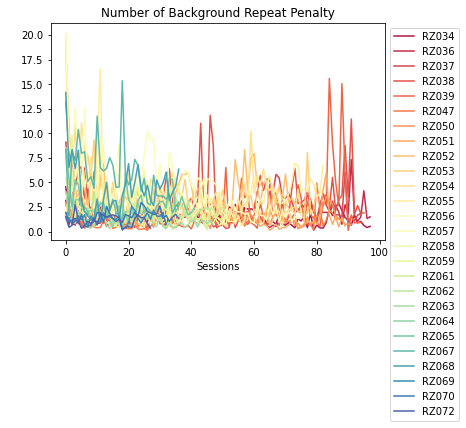

In [72]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_mean', 
                         plot_name="num_bg_repeats_mean", 
                         title='Number of Background Repeat Penalty',
                         x_label='Sessions', 
                         y_label=' ')

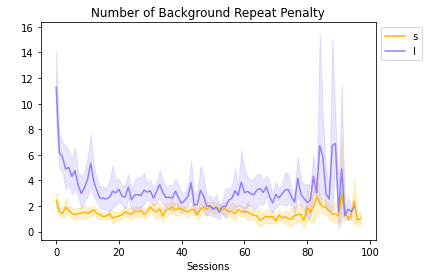

In [73]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_mean", 
                               plot_name='num_bg_repeats_mean_by_group', 
                               title='Number of Background Repeat Penalty', 
                               x_label='Sessions', 
                               y_label=' ')

### plot mistake rate

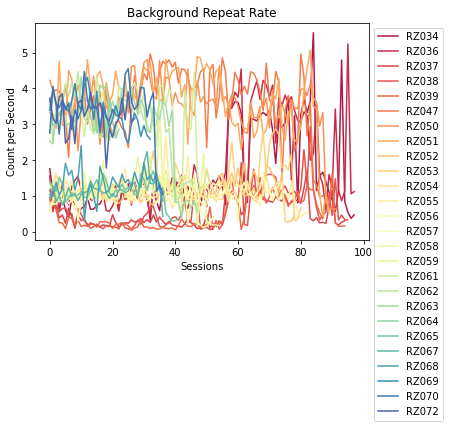

In [74]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_rate_mean', 
                         plot_name="num_bg_repeats_rate_mean", 
                         title='Background Repeat Rate',
                         x_label='Sessions', 
                         y_label='Count per Second')

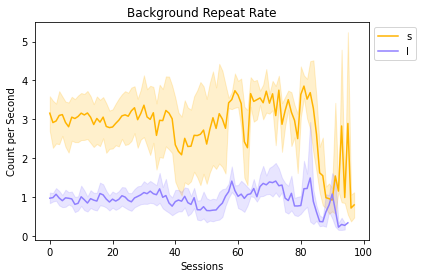

In [75]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_rate_mean", 
                               plot_name='num_bg_repeats_rate_mean_by_group', 
                               title='Background Repeat Rate', 
                               x_label='Sessions', 
                               y_label='Count per Second')

# Plot time wait behavior

### generate wait df for plotting

In [76]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'session', 'dir', 'group', 'cohort']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [77]:
wait_df = generate_wait_df(sessions_training)
wait_df_c5 = wait_df.loc[wait_df.cohort=='cohort_5']
wait_df_c6 = wait_df.loc[wait_df.cohort=='cohort_6']
wait_df_c7 = wait_df.loc[wait_df.cohort=='cohort_7']

### plot time watied

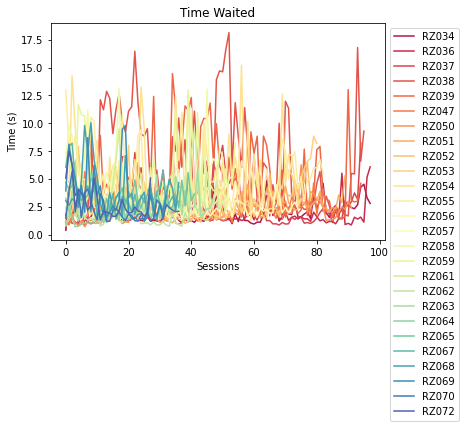

In [78]:
# plot the time waited over days. 
plot_each_mouse_per_line(data_df=wait_df, column_name='tw_mean', plot_name="tw_mean", title='Time Waited', x_label='Sessions', y_label='Time (s)')

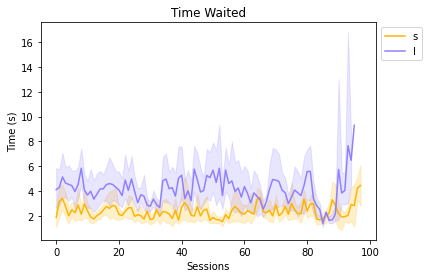

In [79]:
plot_overdays_colored_by_group(data_df=wait_df, column_name="tw_mean", plot_name='tw_mean_by_group_all', title='Time Waited', x_label='Sessions', y_label='Time (s)')

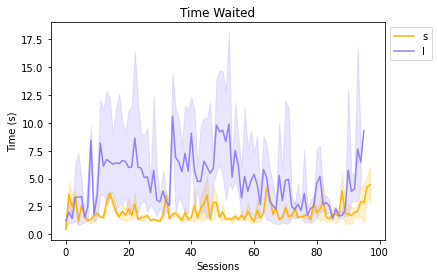

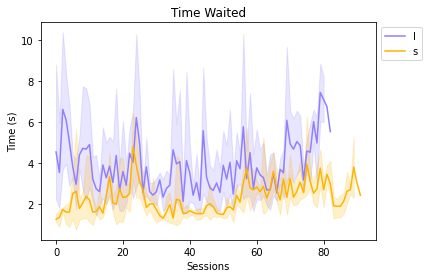

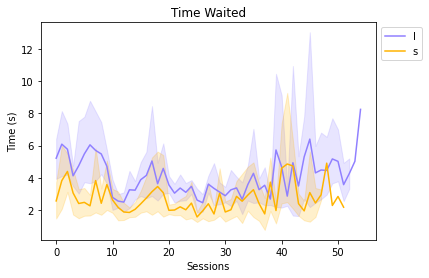

In [80]:
plot_overdays_colored_by_group(data_df=wait_df_c5, column_name="tw_mean", plot_name='tw_mean_by_group_c5', title='Time Waited', x_label='Sessions', y_label='Time (s)')
plot_overdays_colored_by_group(data_df=wait_df_c6, column_name="tw_mean", plot_name='tw_mean_by_group_c6', title='Time Waited', x_label='Sessions', y_label='Time (s)')
plot_overdays_colored_by_group(data_df=wait_df_c7, column_name="tw_mean", plot_name='tw_mean_by_group_c7', title='Time Waited', x_label='Sessions', y_label='Time (s)')

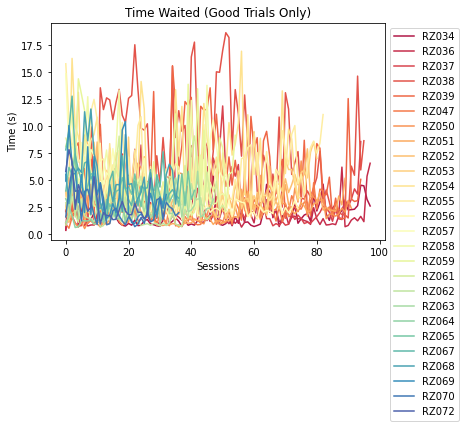

In [81]:
# plot the time waited over days good trials only. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean_g', 
                         plot_name="tw_mean_g", 
                         title='Time Waited (Good Trials Only)',
                         x_label='Sessions', 
                         y_label='Time (s)')

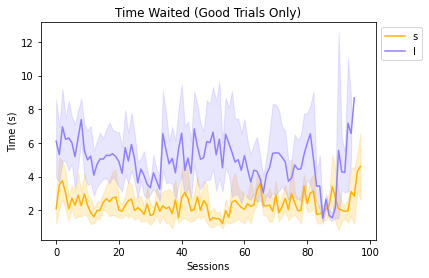

In [82]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean_g", 
                               plot_name='tw_mean_g_by_group', 
                               title='Time Waited (Good Trials Only)', 
                               x_label='Sessions', 
                               y_label='Time (s)')

### between group t_test

In [83]:
def plot_tw_box(data_df, figure_name, figure_title):
    plt.figure(figsize=(1.5, 6))
    sns.boxplot(data=wait_df, x="group", y="tw_mean", palette=custom_palette)
    plt.title(figure_title)
    plt.ylabel("Time (s)")
    plt.xlabel("Group")
    plt.savefig(f'{figure_folder}/{figure_name}.png', bbox_inches='tight')

    short = data_df[data_df['group']=='s']
    long = data_df[data_df['group']=='l']

    print(f'{len(short.mouse.unique())+len(long.mouse.unique())} mice total')
    print(f'{len(short.mouse.unique())} short mice, {len(long.mouse.unique())} long mice')
    print(short.tw_mean.mean())
    print(long.tw_mean.mean())
    print("diff:", long.tw_mean.mean()-short.tw_mean.mean())
    ttest = stats.ttest_ind(short['tw_mean'], long['tw_mean'])
    p_val_t = ttest[1]
    print(p_val_t)

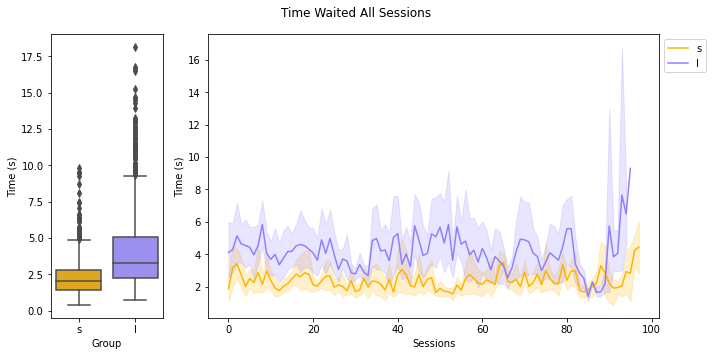

In [84]:
def plot_tw_subplots(data_df, column_name, plot_name, title, x_label, y_label, 
                     figure_folder, color_palette, ylim=None):
    """
    Plots two subplots: 
        1. Box plot of 'column_name' by group.
        2. Line plot of 'column_name' over sessions, colored by group.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 4]})  # Adjust subplot widths

    # Box plot (left)
    sns.boxplot(data=data_df, x="group", y=column_name, palette=color_palette, ax=axes[0])
    axes[0].set_ylabel(y_label)
    axes[0].set_xlabel("Group")

    # Line plot (right)
    sns.lineplot(x="session",
                 y=column_name,
                 hue="group",
                 data=data_df,
                 palette=color_palette,
                 ax=axes[1])
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    if ylim:
        axes[1].set_ylim(ylim)
    axes[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
    plt.suptitle(title)
    plt.tight_layout()
    
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

# Example usage:
plot_tw_subplots(data_df=wait_df, column_name="tw_mean", 
                 plot_name='tw_subplots', title='Time Waited All Sessions', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)

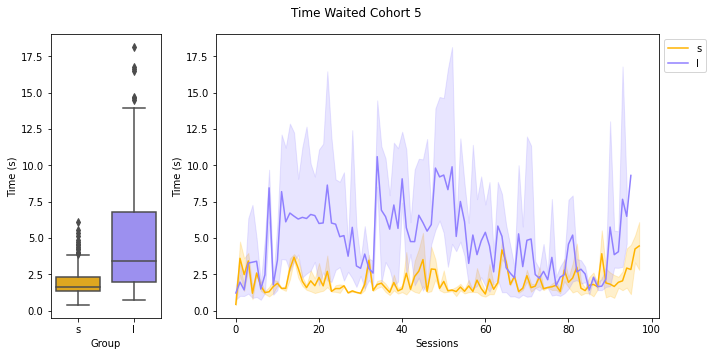

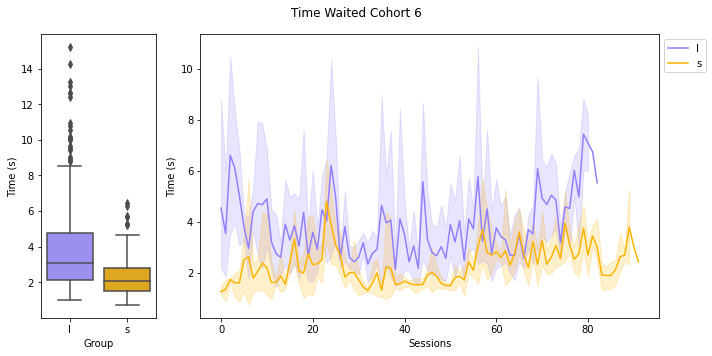

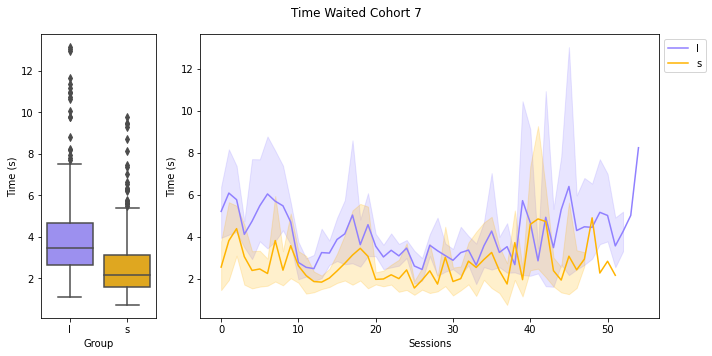

In [85]:
plot_tw_subplots(data_df=wait_df_c5, column_name="tw_mean", 
                 plot_name='tw_subplots_c5', title='Time Waited Cohort 5', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)
plot_tw_subplots(data_df=wait_df_c6, column_name="tw_mean", 
                 plot_name='tw_subplots_c6', title='Time Waited Cohort 6', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)
plot_tw_subplots(data_df=wait_df_c7, column_name="tw_mean", 
                 plot_name='tw_subplots_c7', title='Time Waited Cohort 7', 
                 x_label='Sessions', y_label='Time (s)', 
                 figure_folder=figure_folder, 
                 color_palette=custom_palette)

26 mice total
12 short mice, 14 long mice
2.3543489123876276
4.158621276811051
diff: 1.804272364423423
1.3510228919503722e-53


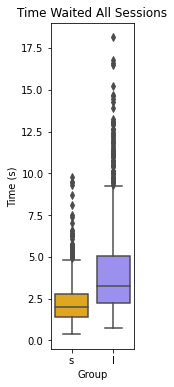

In [86]:
plot_tw_box(wait_df, 'tw_box_all', "Time Waited All Sessions")

5 mice total
2 short mice, 3 long mice
2.0057165777814556
4.818703099945606
diff: 2.81298652216415
5.1418843645980677e-23
8 mice total
3 short mice, 5 long mice
2.3015271394744348
3.787042846421632
diff: 1.4855157069471971
1.2156202647117061e-20
13 mice total
7 short mice, 6 long mice
2.6625347939897606
4.005065117959414
diff: 1.3425303239696533
1.180108323629497e-14


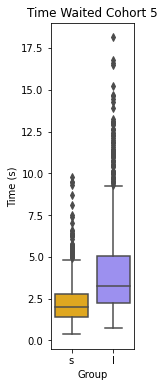

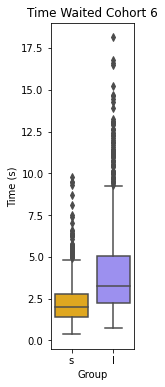

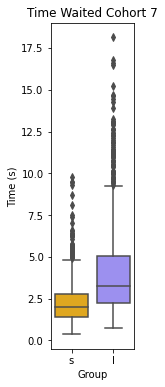

In [87]:
plot_tw_box(wait_df_c5, 'tw_box_c5', "Time Waited Cohort 5")
plot_tw_box(wait_df_c6, 'tw_box_c6', "Time Waited Cohort 6")
plot_tw_box(wait_df_c7, 'tw_box_c7', "Time Waited Cohort 7")

by days sessions tw difference

In [88]:
def generate_p_val_df(wait_df, group_col_name):
    """
    Generates a DataFrame with p-values and significance stars for t-tests 
    between two groups within each category.
    """
    result_list = []
    for num, data in wait_df.groupby(group_col_name):
        short = data[data['group']=='s']
        long = data[data['group']=='l']
        s_tw = short.tw_mean.mean()
        l_tw = long.tw_mean.mean()

        # Perform t-test
        ttest = stats.ttest_ind(short['tw_mean'], long['tw_mean'])
        p_val_t = ttest[1]

        # Determine significance stars
        stars = ""
        if p_val_t < 0.05:
            stars += "*"
        if p_val_t < 0.01:
            stars += "*"
        if p_val_t < 0.001:
            stars += "*"
        if p_val_t < 0.0001:
            stars += "*"

        result_list.append([num, s_tw, l_tw, p_val_t, stars])

    return pd.DataFrame(result_list, columns=["period", "s_tw", "l_tw", "p_val_t", "sig"])


plot waiting df in 10 day intervals

In [89]:
wait_df['period'] = wait_df['session']//10 #add session period in 10 day intervals

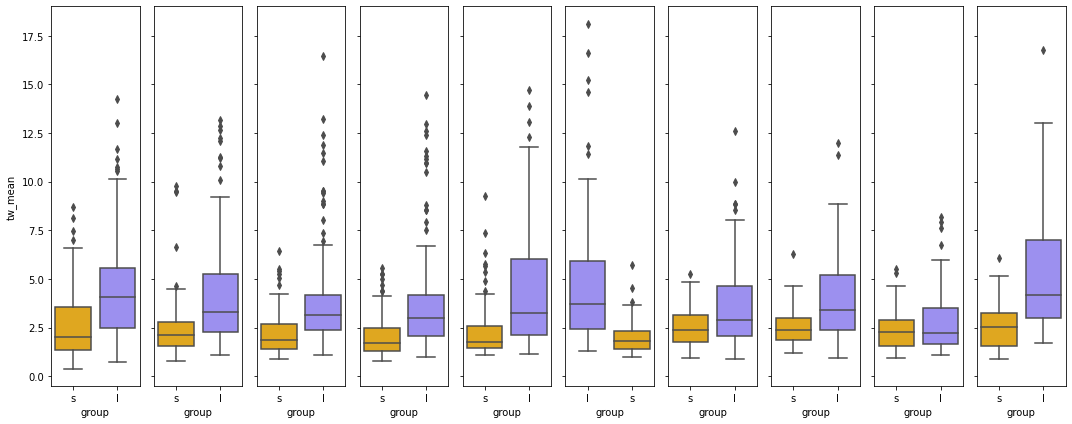

In [90]:
num_subplots = wait_df['period'].max()+1
fig, axs = plt.subplots(1, num_subplots, figsize=(num_subplots*1.5, 6), sharey=True)
for p, period_data in wait_df.groupby('period'):
    sns.boxplot(data=period_data,
                x="group", 
                y="tw_mean", 
                palette=custom_palette,
                ax=axs.flat[p])
    if p != 0:
        axs.flat[p].set_ylabel("")

plt.tight_layout()
plt.savefig(f'{figure_folder}/tw_box_by_period.png', bbox_inches='tight')

In [91]:
tw_stats_by_period = generate_p_val_df(wait_df, "period")
tw_stats_by_period['diff'] = tw_stats_by_period.l_tw - tw_stats_by_period.s_tw
tw_stats_by_period[tw_stats_by_period['p_val_t'] < 0.05]

,period,s_tw,l_tw,p_val_t,sig,diff
0,0,2.594960,4.557637,1.931644e-10,****,1.962677
1,1,2.373256,4.111122,1.355203e-09,****,1.737866
2,2,2.203423,3.883085,6.947817e-10,****,1.679662
3,3,2.069565,3.842871,3.245970e-08,****,1.773306
4,4,2.406835,4.487308,3.875652e-07,****,2.080472
5,5,2.055258,4.730688,1.531319e-07,****,2.675430
6,6,2.485425,3.674338,9.542030e-04,***,1.188913
7,7,2.530144,4.016126,5.861578e-05,****,1.485983
8,8,2.368176,3.158574,2.638501e-02,*,0.790398
9,9,2.734914,5.789461,6.668888e-03,**,3.054548


### example session plot

In [92]:
sessions_training.loc[sessions_training.session == 28]

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean,miss_trials,good_trials
139,139,139,RZ034,2024-03-05,10-21-34,2,regular,rig2,0.065,1.29,...,496.0,700.0,2817.74,NaN,NaN,NaN,cohort_5,1.289811,0.0,297.0
140,140,140,RZ036,2024-03-05,10-24-20,2,regular,rig3,0.059,1.42,...,428.0,700.0,2501.15,NaN,NaN,NaN,cohort_5,1.415220,0.0,169.0
142,142,142,RZ038,2024-03-05,11-14-12,2,regular,rig3,0.059,2.54,...,315.0,700.0,3861.71,NaN,NaN,NaN,cohort_5,2.542159,0.0,174.0
143,143,143,RZ039,2024-03-05,12-22-43,2,regular,rig3,0.059,12.41,...,194.0,700.0,4570.03,NaN,NaN,NaN,cohort_5,12.409773,11.0,154.0
146,146,146,RZ037,2024-03-06,12-32-44,2,regular,rig2,0.065,2.23,...,400.0,700.0,5114.97,NaN,NaN,NaN,cohort_5,2.230032,1.0,183.0
701,729,729,RZ053,2024-07-31,11-25-09,2,regular,rig2,NaN,3.22,...,272.0,545.0,3546.66,Rebekah,False,miss,cohort_6,3.215085,6.0,232.0
704,732,732,RZ047,2024-08-01,09-47-58,2,regular,rig2,NaN,2.10,...,384.0,700.0,2444.62,Rebekah,False,reward,cohort_6,2.095998,1.0,337.0
705,734,734,RZ050,2024-08-01,10-33-36,2,regular,rig2,NaN,2.17,...,465.0,700.0,3309.16,Rebekah,False,reward,cohort_6,2.168289,5.0,233.0
707,736,736,RZ052,2024-08-01,11-26-00,2,regular,rig3,NaN,1.87,...,406.0,700.0,16033.72,Rebekah,False,miss,cohort_6,2.005664,3.0,165.0
709,738,738,RZ054,2024-08-01,12-29-38,2,regular,rig3,NaN,2.23,...,429.0,700.0,6086.15,Rebekah,False,reward,cohort_6,2.228589,0.0,215.0


In [93]:
long_info = sessions_training.loc[sessions_training.dir=="2024-03-05_12-22-43_RZ039"].iloc[0]
trials_long = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, long_info))

short_info = sessions_training.loc[sessions_training.dir=="2024-07-31_10-44-41_RZ051"].iloc[0]
trials_short = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, short_info))

In [94]:
trials_examples = pd.concat([trials_long, trials_short])

In [95]:
trials_examples

,session_trial_num,block_trial_num,block_num,start_time,end_time,bg_drawn,bg_length,bg_repeats,num_bg_licks,miss_trial,time_waited,reward,num_consumption_lick,num_pump,good_trial,group
0,0.0,0.0,0.0,1.709659e+09,1.709659e+09,5.5,13.572507,19,18,False,0.437155,0.0,1.0,1.0,False,l
1,1.0,1.0,0.0,1.709659e+09,1.709659e+09,4.6,8.684359,3,2,False,4.315466,5.0,11.0,41.0,False,l
2,2.0,2.0,0.0,1.709659e+09,1.709659e+09,5.5,6.241992,5,4,False,2.603563,5.0,12.0,42.0,False,l
3,3.0,3.0,0.0,1.709659e+09,1.709659e+09,5.2,5.366355,2,1,False,2.347738,5.0,13.0,42.0,False,l
4,4.0,4.0,0.0,1.709659e+09,1.709659e+09,4.8,4.806263,1,0,False,3.134031,5.0,14.0,42.0,True,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334.0,334.0,0.0,1.722439e+09,1.722439e+09,1.0,0.006339,1,0,False,2.236813,0.0,4.0,1.0,True,s
335,335.0,335.0,0.0,1.722439e+09,1.722439e+09,1.1,0.006589,1,0,False,2.329101,0.0,2.0,0.0,True,s
336,336.0,336.0,0.0,1.722439e+09,1.722439e+09,0.8,0.006091,1,0,False,2.388075,0.0,3.0,1.0,True,s
337,337.0,337.0,0.0,1.722439e+09,1.722439e+09,1.0,0.006619,1,0,False,11.453166,5.0,10.0,35.0,True,s


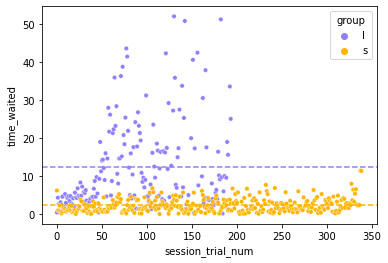

In [96]:
sns.scatterplot(x="session_trial_num",
                y="time_waited",
                hue="group",
                data=trials_examples,
                palette=custom_palette,
                s=20)
plt.axhline(y=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axhline(y=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_scatter.png')

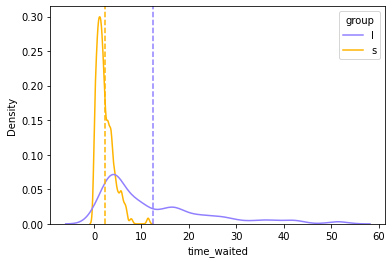

In [97]:
sns.kdeplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_kde.png')

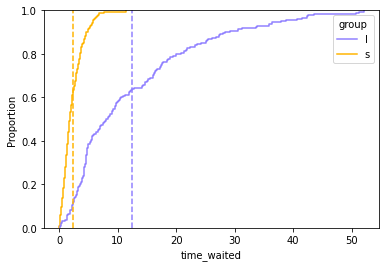

In [98]:
sns.ecdfplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_ecdf.png')

In [99]:
sessions_training.loc[sessions_training.session == 36]

,Unnamed: 0.1,Unnamed: 0,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,...,num_trials,rewards,session_time,trainer,record,ending_code,cohort,tw_mean,miss_trials,good_trials
178,178,178,RZ034,2024-03-18,11-34-04,2,regular,rig2,0.067,1.28,...,377.0,500.0,2167.75,NaN,NaN,NaN,cohort_5,1.281710,0.0,154.0
181,181,181,RZ038,2024-03-18,12-28-57,2,regular,rig2,0.067,10.48,...,78.0,220.0,1989.16,NaN,NaN,NaN,cohort_5,10.475164,11.0,53.0
182,182,182,RZ039,2024-03-18,13-04-52,2,regular,rig2,0.067,5.57,...,235.0,700.0,3647.60,NaN,NaN,NaN,cohort_5,5.566766,5.0,195.0
184,184,184,RZ036,2024-03-19,10-18-47,2,regular,rig3,0.066,1.86,...,387.0,700.0,2404.94,NaN,NaN,NaN,cohort_5,1.856785,0.0,207.0
185,185,185,RZ037,2024-03-19,11-33-24,2,regular,rig2,0.067,3.34,...,290.0,700.0,4138.90,NaN,NaN,NaN,cohort_5,3.342198,9.0,139.0
763,799,799,RZ053,2024-08-13,12-41-00,2,regular,rig2,NaN,1.35,...,591.0,1010.0,14210.25,Rebekah,False,reward,cohort_6,2.080813,7.0,239.0
767,803,803,RZ047,2024-08-14,10-19-16,2,regular,rig3,NaN,0.95,...,609.0,700.0,3333.03,Rebekah,False,reward,cohort_6,0.952864,0.0,229.0
768,805,805,RZ050,2024-08-14,11-13-50,2,regular,rig2,NaN,4.36,...,345.0,700.0,3517.56,Rebekah,False,reward,cohort_6,4.359111,10.0,218.0
770,807,807,RZ052,2024-08-14,12-15-34,2,regular,rig3,NaN,1.21,...,408.0,575.0,12021.16,Rebekah,False,miss,cohort_6,1.522386,11.0,102.0
772,809,809,RZ054,2024-08-14,14-15-04,2,regular,rig3,NaN,6.68,...,241.0,700.0,3853.56,Rebekah,False,reward,cohort_6,6.679285,3.0,190.0


In [100]:
long_info = sessions_training.loc[sessions_training.dir=="2024-08-13_14-19-06_RZ054"].iloc[0]
trials_long = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, long_info))

short_info = sessions_training.loc[sessions_training.dir=="2024-08-13_10-45-33_RZ047"].iloc[0]
trials_short = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, short_info))

trials_examples = pd.concat([trials_long, trials_short])

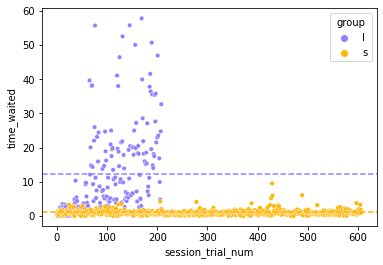

In [101]:
sns.scatterplot(x="session_trial_num",
                y="time_waited",
                hue="group",
                data=trials_examples,
                palette=custom_palette,
                s=20)
plt.axhline(y=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axhline(y=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_scatter_2.png')

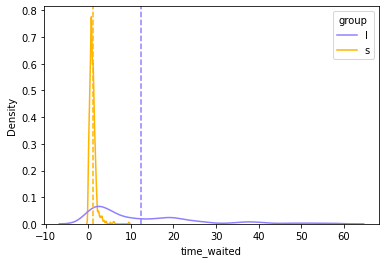

In [102]:
sns.kdeplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_kde_2.png')

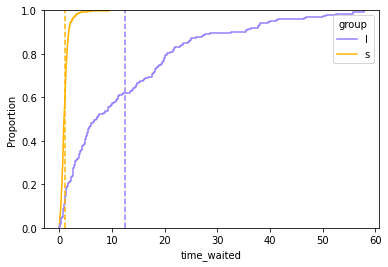

In [103]:
sns.ecdfplot(data=trials_examples.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette)
plt.axvline(x=trials_examples.loc[trials_examples.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
plt.axvline(x=trials_examples.loc[trials_examples.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
plt.savefig(f'{figure_folder}/example_sessions_ecdf_2.png')

## plots to be figured out

In [ ]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean, session_mouse.tw_stdev, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[3].axis('off')
        axs.flat[4].axis('off')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean_g, session_mouse.tw_stdev_g, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median_g, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[2].axis('off')
        # axs.set_ylim(0, 35)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_good_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
def calculate_subplot_row_col(session_mouse, plots_per_row):
    days_trained = len(session_mouse)
    num_rows = (days_trained - 1) // plots_per_row + 1
    num_cols = min(days_trained, plots_per_row)
    return num_rows, num_cols

In [ ]:
for mouse in mouse_list:
    session_mouse = sessions_training.loc[sessions_training.mouse == mouse]
    num_rows, num_cols = calculate_subplot_row_col(session_mouse, 8)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21.5, 2.5 * num_rows))

    for i, (_, session_info) in enumerate(session_mouse.iterrows()):
        all_trials = utils_c5.load_data(utils_c5.generate_trials_analyzed_path(data_folder, session_info))
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="group",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_ylim([0,35])
        ax.set_title(f'Session {i}')
        ax.legend().remove()
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)
    plt.close()

# Stitched all sessions all mice per day

In [ ]:
stitched_folder = os.path.join(data_dir, cohort, exp, 'stitched')
stitched_figure_folder = os.path.join(data_dir, cohort, exp, 'figures')
print(data_folder)
print(figure_folder)

In [ ]:
stitched_log = utils.load_session_log(stitched_folder, f'sessions_training_stitched_{exp}.csv')

In [ ]:
def generate_events_processed_stitched_path(data_folder, session_info):
    filename = f'events_processed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, f"{session_info.date}", filename)

In [ ]:
def generate_trials_analyzed_stitched_path(data_folder, session_info):
    filename = f'trials_analyzed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, session_info.date, filename)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_cdf.png', bbox_inches='tight', dpi=300)

In [ ]:
def select_non_accident_trials(all_trials):
    non_accident_trials = all_trials[all_trials['time_waited'] > 0.5]
    return non_accident_trials

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_cdf.png', bbox_inches='tight', dpi=300)